# Flight Price Prediction

In [330]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [418]:
df=pd.read_excel('data/data.xlsx')  #load data from excel file

In [332]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [334]:
df.shape

(10683, 11)

In [335]:
df.dropna(inplace=True)    #Considering the size of dataset drop columns having nan values
df.shape

(10682, 11)

In [336]:
df['Journey_Day']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Day'].head()

0    24
1     1
2     9
3    12
4     1
Name: Journey_Day, dtype: int64

In [337]:
df['Journey_month']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['Journey_month'].head()

0    3
1    5
2    6
3    5
4    3
Name: Journey_month, dtype: int64

In [338]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [339]:
df['Arr_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_min']=pd.to_datetime(df.Arrival_Time).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


In [340]:
df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [341]:
d=list(df['Duration'])
for i in range(len(d)):
    if 'm' not in d[i]:
        d[i]=d[i].strip()+ ' 0m'
    elif 'h' not in d[i]:
        d[i]= '0h ' + d[i].strip()
d_hour=[]
d_min=[]
for i in range(len(d)):
    d_hour.append(int(d[i].split('h')[0]))
    d_min.append(int(d[i].split('m')[0].split()[-1]))

In [342]:
df['dur_hours']=d_hour
df['dur_mins']=d_min
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [343]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route','Additional_Info'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,21,35,16,50,4,45


In [344]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

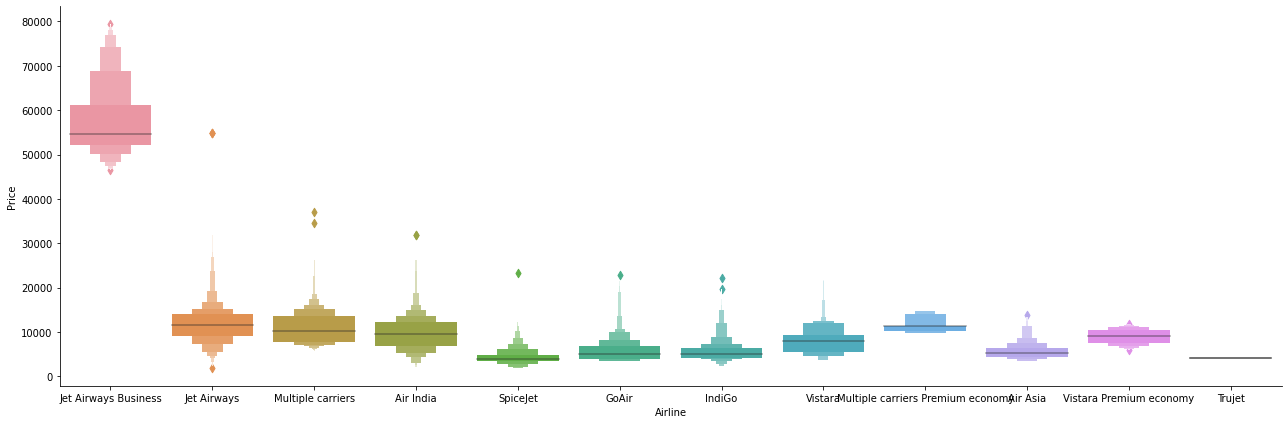

In [345]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [346]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [347]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

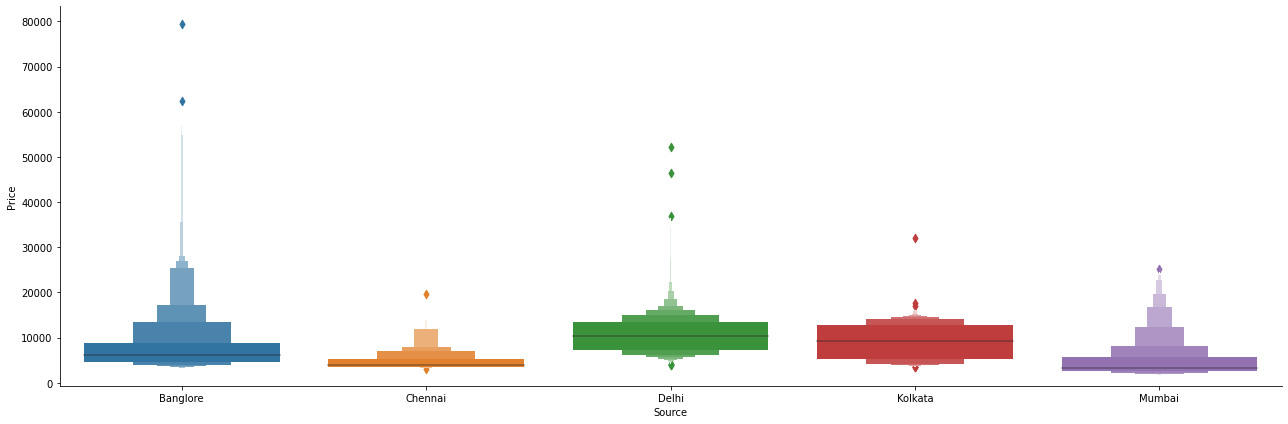

In [348]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Source'),kind='boxen',height=6,aspect=3)

In [349]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [350]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

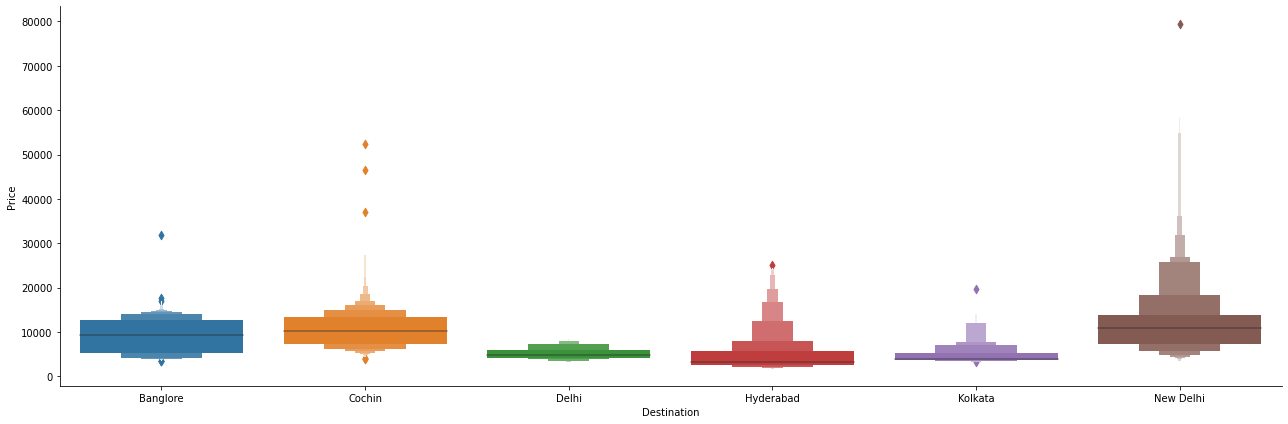

In [351]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Destination'),kind='boxen',height=6,aspect=3)

In [352]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [353]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,21,35,16,50,4,45


In [354]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [355]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [356]:
df_f=pd.concat([df,Airline,Source,Destination],axis=1)
df_f.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,...,0,0,0,0,0,0,0,0,0,1


In [357]:
df_f.drop(['Airline','Source','Destination','Duration'],inplace=True,axis=1)
df_f.head()

,Total_Stops,Price,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [358]:
df_f.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month', 'Arr_hour',
       'Arr_min', 'Dep_hour', 'Dep_min', 'dur_hours', 'dur_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

(2671, 28)

In [360]:
X=df_f.drop(['Price'],axis=1)
X.head()


,Total_Stops,Journey_Day,Journey_month,Arr_hour,Arr_min,Dep_hour,Dep_min,dur_hours,dur_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,13,15,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,4,25,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,23,30,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,21,35,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [361]:
Y=df_f['Price']
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

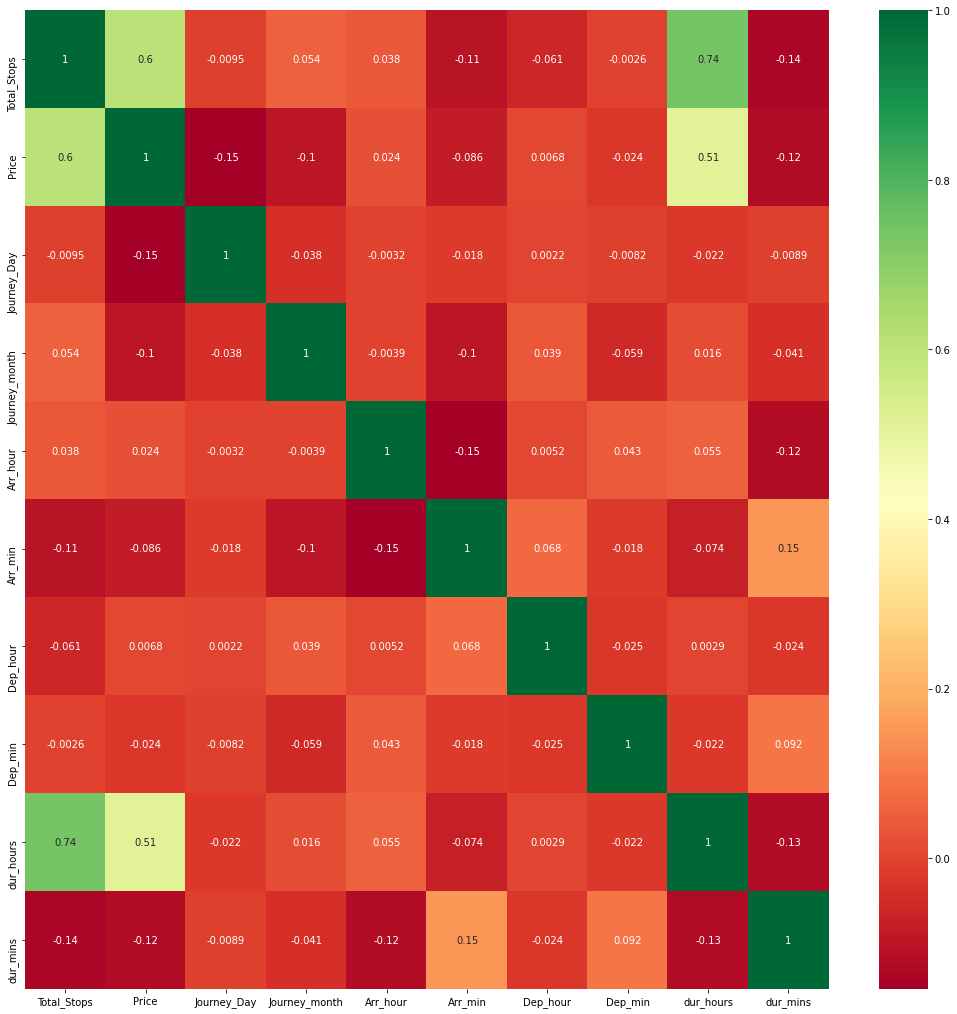

In [362]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [368]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)


ExtraTreesRegressor()

In [364]:
print(selection.feature_importances_)

[2.41188718e-01 1.44507577e-01 5.33342487e-02 2.64100562e-02
 1.95895738e-02 2.42741209e-02 2.13387439e-02 1.10979488e-01
 1.78727575e-02 8.63085536e-03 1.70862789e-03 1.74284801e-02
 1.40142189e-01 6.74463001e-02 1.99940482e-02 8.50658481e-04
 2.89146604e-03 1.25479542e-04 4.99768812e-03 8.88313862e-05
 4.87094492e-04 8.49459029e-03 3.06000333e-03 5.48535939e-03
 9.18632775e-03 1.61639450e-02 7.94870541e-03 4.72842561e-04
 2.49012243e-02]


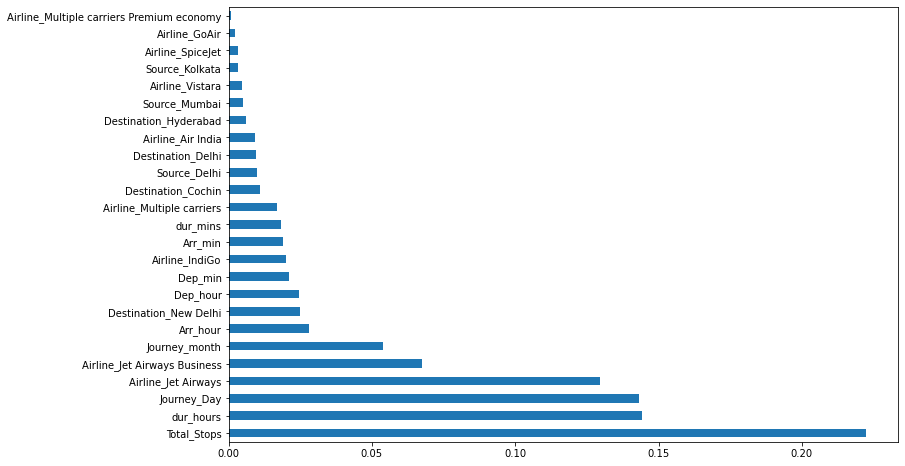

In [371]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [396]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [398]:
reg_rf.predict(X_test)
reg_rf.score(X_train, Y_train)

0.9528542355126794

In [400]:
reg_rf.predict(X_test)
reg_rf.score(X_test, Y_test)

0.7969261514724082

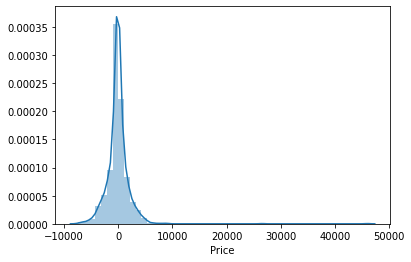

In [402]:
sns.distplot(Y_test-y_pred)
plt.show()

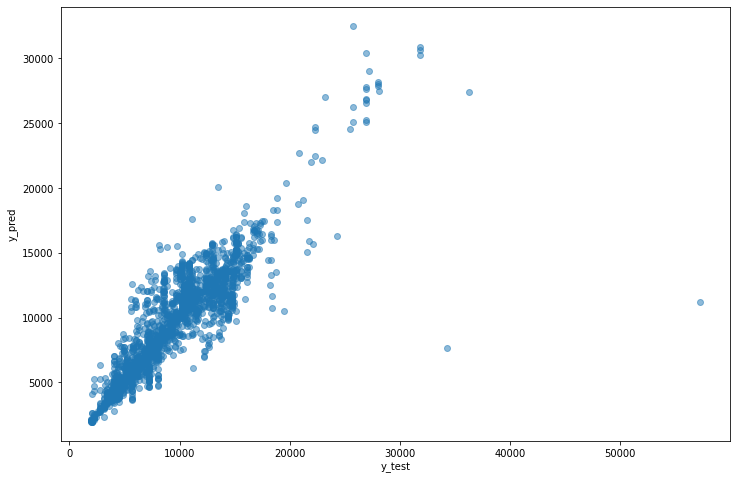

<Figure size 864x576 with 0 Axes>

In [413]:
plt.figure(figsize = (12,8))
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize = (12,8))
plt.show()


In [415]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 1181.0797491350095
MSE: 4389596.428877462
RMSE: 2095.1363747683495


In [417]:
metrics.r2_score(Y_test, y_pred) #r square value

0.796420324532841